My first notebook - 
Linear regression

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
# from lab_utils_common import dlc
# from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
# plt.style.use('./deeplearning.mplstyle')
from lab_utils_common import dlc
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [182]:
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(10000)
    X = rng.random(400).reshape(-1, 2)
    X[:, 1] = X[:, 1] * 4 + 11.5
    X[:, 0] = X[:, 0] * (280 - 150) + 150
    Y = np.zeros(200);
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d <= y):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [183]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)


(200, 2) (200, 1)


In [184]:
def plt_roast(X, Y):
    Y = Y.reshape(-1,)
    colormap = np.array(['r', 'b'])
    fig, ax = plt.subplots(1,1,)
    ax.scatter(X[Y==1,0],X[Y==1,1], s=70, marker='x', c='red', label="Good Roast" )
    ax.scatter(X[Y==0,0],X[Y==0,1], s=100, marker='o', facecolors='none', 
               edgecolors=dlc["dlblue"],linewidth=1,  label="Bad Roast")
    tr = np.linspace(175,260,50)
    ax.plot(tr, (-3/85) * tr + 21, color=dlc["dlpurple"],linewidth=1)
    ax.axhline(y=12,color=dlc["dlpurple"],linewidth=1)
    ax.axvline(x=175,color=dlc["dlpurple"],linewidth=1)
    ax.set_title(f"Coffee Roasting", size=16)
    ax.set_xlabel("Temperature \n(Celsius)",size=12)
    ax.set_ylabel("Duration \n(minutes)",size=12)
    ax.legend(loc='upper right')
    plt.show()

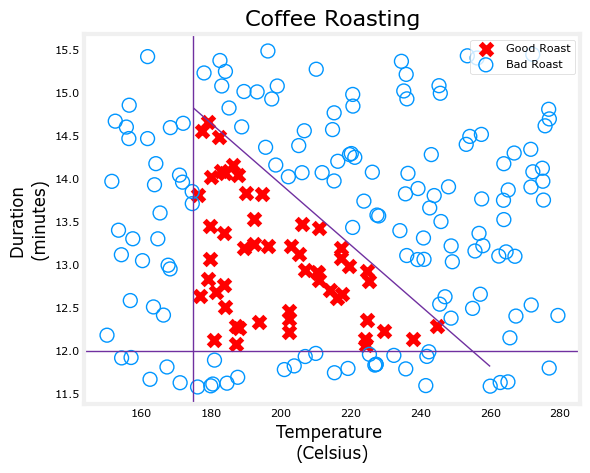

In [185]:
plt_roast(X, Y)

In [186]:
# print(X)
norm_l = tf.keras.layers.Normalization(axis = -1)
norm_l.adapt(X)
X_n = norm_l(X)


# print(X_n)


In [187]:
X_t = np.tile(X_n, (1000, 1))
Y_t = np.tile(Y, (1000, 1))
print(X_t.shape, Y_t.shape)

(200000, 2) (200000, 1)


In [188]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape = (2,)),
        Dense(3, activation = 'sigmoid', name = 'layer1'),
        Dense(1, activation = 'sigmoid', name = 'layer2')
    ]
)


In [189]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()

print(f"W1{W1.shape}\n {W1}", f"\nb1{b1.shape}\n {b1}")
print(f"W2{W2.shape}\n {W2}", f"\nb2{b2.shape}\n {b2}")

W1(2, 3)
 [[0.5  0.87 0.68]
 [0.89 0.41 0.97]] 
b1(3,)
 [0. 0. 0.]
W2(3, 1)
 [[-0.34]
 [ 0.56]
 [ 0.22]] 
b2(1,)
 [0.]


In [191]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(
    X_t, Y_t,
    epochs = 10
)

Epoch 1/10
6250/6250 [==============================] - 5s 742us/step - loss: 0.2974
Epoch 2/10
6250/6250 [==============================] - 5s 756us/step - loss: 0.0811
Epoch 3/10
6250/6250 [==============================] - 5s 756us/step - loss: 0.0138
Epoch 4/10
6250/6250 [==============================] - 5s 758us/step - loss: 0.0063
Epoch 5/10
6250/6250 [==============================] - 5s 759us/step - loss: 0.0035
Epoch 6/10
6250/6250 [==============================] - 5s 754us/step - loss: 0.0022
Epoch 7/10
6250/6250 [==============================] - 5s 740us/step - loss: 0.0014
Epoch 8/10
6250/6250 [==============================] - 5s 751us/step - loss: 8.9563e-04
Epoch 9/10
6250/6250 [==============================] - 4s 715us/step - loss: 5.7671e-04
Epoch 10/10
6250/6250 [==============================] - 5s 721us/step - loss: 3.8500e-04


In [192]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()

print(f"W1{W1.shape}\n {W1}", f"\nb1{b1.shape}\n {b1}")
print(f"W2{W2.shape}\n {W2}", f"\nb2{b2.shape}\n {b2}")

W1(2, 3)
 [[ 2.92e+01  1.52e+01  2.72e-01]
 [ 2.36e+01  2.05e-03 -1.19e+01]] 
b1(3,)
 [ -3.19  15.71 -15.18]
W2(3, 1)
 [[-64.75]
 [ 51.69]
 [-64.24]] 
b2(1,)
 [-20.7]


In [203]:

Y_test = model.predict(X_n)

7/7 [==============================] - 0s 834us/step


In [208]:
y_hat = (Y_test >= 0.5).astype(int)

count = 0
for i in range(len(y_hat)):
    if y_hat[i] != Y[i]:
        count += 1

print(count)

0
